In [155]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import pandas as pd

In [7]:
pwd

'/p/home/jusers/cherepashkin1/jureca/circles/finetune_test'

In [8]:
mainpath = '/p/home/jusers/cherepashkin1/jureca/\
cherepashkin1/phenoseed/598/1484717/1491988_Surface.ply'
pcd = open3d.io.read_point_cloud(mainpath)

In [9]:

img = np.asarray(pcd.points)

In [10]:
img.shape

(29212, 3)

In [11]:
Far = np.genfromtxt('/p/home/jusers/cherepashkin1/jureca/\
cherepashkin1/phenoseed_csv/598csv/1484717/1491988_Far_500.csv',delimiter=',')
dirs = np.genfromtxt('/p/home/jusers/cherepashkin1/jureca/\
cherepashkin1/phenoseed_csv/bX_500.csv',delimiter=',')
y_n = np.genfromtxt('/p/home/jusers/cherepashkin1/jureca/\
cherepashkin1/phenoseed_csv/Y_N_500.csv',delimiter=',')

In [12]:
Far.shape, dirs.shape

((500,), (2, 500))

In [13]:
def pointsff(Far):
    p = dirs[0,:]
    t = dirs[1,:]
    newp = np.zeros([3,500])
    newp[0,:] = Far * np.cos(p) * np.sin(t)
    newp[1,:] = Far * np.sin(p) * np.sin(t)
    newp[2,:] = Far * np.cos(t)
    return(newp.astype(int))

In [174]:
o = np.genfromtxt('/p/home/jusers/cherepashkin1/jureca/\
cherepashkin1/598test/plot_output/e040/001/o', delimiter = ',')
gt = np.genfromtxt('/p/home/jusers/cherepashkin1/jureca/\
cherepashkin1/598test/plot_output/e040/001/gt', delimiter = ',')

In [16]:
gt.shape

(441,)

In [17]:
F_o = np.matmul(y_n,o[0])
F_gt = np.matmul(y_n,gt)
pts_o = pointsff(F_o)
pts_gt = pointsff(F_gt)

In [18]:
pts_o.shape

(3, 500)

In [19]:
o.shape

(40, 441)

In [20]:
from open3d import *

In [21]:
from open3d.geometry.PointCloud import compute_point_cloud_to_point_cloud_distance

ModuleNotFoundError: No module named 'open3d.geometry'

In [39]:
print(np.mean(pts_o, axis=1), np.mean(pts_gt, axis=1))

[ 0.102  0.23  -0.22 ] [ 0.532 -0.046 -0.554]


In [32]:
pcdo = o3d.geometry.PointCloud()
pcdo.points = o3d.utility.Vector3dVector(np.transpose(pts_o.astype(int)))
pcdgt = o3d.geometry.PointCloud()
pcdgt.points = o3d.utility.Vector3dVector(np.transpose(pts_gt.astype(int)))

In [50]:
#d1 = open3d.compute_point_cloud_distance(gt, pr)
def fscorec(gt,o,th=0.01):
#th = 0.01
    d1 = o.compute_point_cloud_distance(gt)
    d2 = gt.compute_point_cloud_distance(o)
    if len(d1) and len(d2):
        recall = float(sum(d < th for d in d2)) / float(len(d2))
        precision = float(sum(d < th for d in d1)) / float(len(d1))

        if recall+precision > 0:
            fscore = 2 * recall * precision / (recall + precision)
        else:
            fscore = 0
    else:
        fscore = 0
        precision = 0
        recall = 0
    return(fscore)

In [45]:
fscore

0.036

In [43]:
def calculate_fscore(gt: open3d.geometry.PointCloud, pr: open3d.geometry.PointCloud, th: float=0.01) -> typing.Tuple[float, float, float]:
    '''Calculates the F-score between two point clouds with the corresponding threshold value.'''
    d1 = open3d.compute_point_cloud_to_point_cloud_distance(gt, pr)
    d2 = open3d.compute_point_cloud_to_point_cloud_distance(pr, gt)
    
    if len(d1) and len(d2):
        recall = float(sum(d < th for d in d2)) / float(len(d2))
        precision = float(sum(d < th for d in d1)) / float(len(d1))

        if recall+precision > 0:
            fscore = 2 * recall * precision / (recall + precision)
        else:
            fscore = 0
    else:
        fscore = 0
        precision = 0
        recall = 0

    return fscore, precision, recall

NameError: name 'typing' is not defined

# CHeck if whole point cloud is better than just Surface

In [54]:
print(fscorec(open3d.io.read_point_cloud('/p/home/jusers/cherepashkin1/jureca/\
cherepashkin1/phenoseed/598/1484717/1491988_Surface.ply'),\
              open3d.io.read_point_cloud('/p/home/jusers/cherepashkin1/jureca/\
cherepashkin1/phenoseed/598/1484717/1491990_Surface.ply')))

0.10900545785324439


In [55]:
print(fscorec(open3d.io.read_point_cloud('/p/home/jusers/cherepashkin1/jureca/\
cherepashkin1/phenoseed/598/1484717/1491990_Surface.ply'),\
              open3d.io.read_point_cloud('/p/home/jusers/cherepashkin1/jureca/\
cherepashkin1/phenoseed/598/1484717/1491990.ply')))

0.2769502086884956


# Check that orientation of the seed and angle are the same

In [57]:
from skimage import io, transform, data

In [106]:
cip = []
for root, directories, filenames in os.walk('/p/home/jusers/cherepashkin1/jureca/\
cherepashkin1/phenoseed/598/1484717/'): 
    for filename in filenames:
        if 'rotation_000' in filename:
            cip.append(os.path.join(root,filename))

In [107]:
len(cip)

120

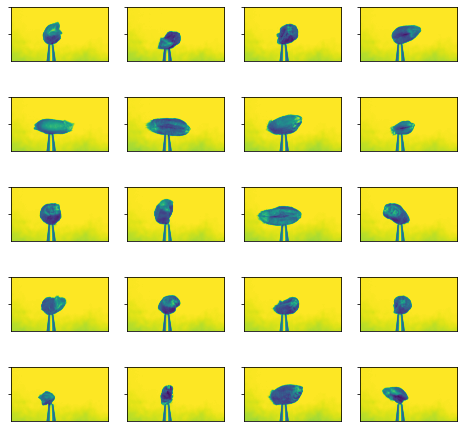

<Figure size 432x288 with 0 Axes>

In [108]:
w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
#    img = np.random.randint(10, size=(h,w))
    img = io.imread(cip[i])
    ax = fig.add_subplot(rows, columns, i)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    plt.imshow(img)
plt.show()
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('rotation_seeds.png')

# Find horizontal pose 

In [111]:
np.sum(255-img)

24508839

In [112]:
cip = []
for root, directories, filenames in os.walk('/p/home/jusers/cherepashkin1/jureca/\
cherepashkin1/phenoseed/598/1484717/1491988/'): 
    for filename in filenames:
        if 'rotation' in filename:
            cip.append(os.path.join(root,filename))

In [121]:
cip = np.sort(cip)

In [ ]:
cip

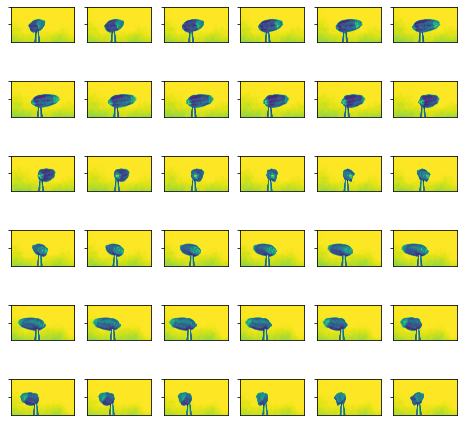

<Figure size 432x288 with 0 Axes>

In [125]:
w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 6
rows = 6
for i in range(1,columns*rows+1):
#    img = np.random.randint(10, size=(h,w))
    img = io.imread(cip[i-1])
    ax = fig.add_subplot(rows, columns, i)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    plt.imshow(img)
plt.show()
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('rotation_seeds.png')

In [141]:
s = np.zeros(36)
for i in range(len(cip)):
    img = io.imread(cip[i])
    s[i] = np.sum(255-img)
np.argmax(s)

8

8

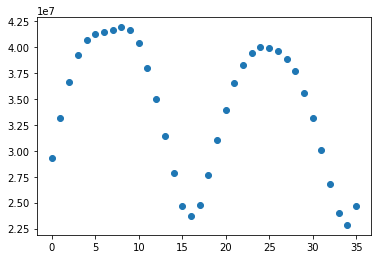

In [138]:
plt.scatter(np.arange(36),s)

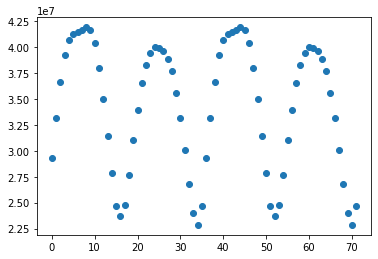

In [137]:
plt.scatter(np.arange(72),np.concatenate((s,s)))

In [146]:
cip = []
for root, directories, filenames in os.walk('/p/home/jusers/cherepashkin1/jureca/\
cherepashkin1/phenoseed/598/1484717/'): 
    for filename in filenames:
        if 'Surface' in filename:
            f2 = filename.split('_Surface')
            cip.append(os.path.join(root,f2[0]))

In [ ]:
cip

In [156]:
mainpath = '/p/home/jusers/cherepashkin1/jureca/cherepashkin1/phenoseed_csv'
#specie = 598
#nsp = 500
pts = os.path.join(mainpath,'pathes_to: '+'598'+'.csv')
lframe = pd.read_csv(pts)

In [161]:
len(lframe)

5270

In [163]:
list_zero = []
for idx in range(len(lframe)):
    rotpath = \
    os.path.join(mainpath.replace('phenoseed_csv', 'phenoseed'),\
                 lframe.iloc[idx, 0].replace('csv', ''))
    s = np.zeros(36)
    for j in range(36):
        img = io.imread(os.path.join(rotpath,'rotation_'+str(10*j).zfill(3)+'.tif'))
        s[i] = np.sum(255-img)
    list_zero.append(np.argmax(s))
    

In [167]:
np.array(list_zero)

array([6, 6])

In [160]:
img_name

'/p/home/jusers/cherepashkin1/jureca/cherepashkin1/phenoseed/598/1484722/1492628'

In [157]:
lframe.head(10)

,file_name
0,598csv/1484722/1492628
1,598csv/1484738/1494683
2,598csv/1484726/1493096
3,598csv/1484728/1493346
4,598csv/1484719/1492281
5,598csv/1484732/1493937
6,598csv/1484730/1493650
7,598csv/1484750/1499524
8,598csv/1484756/1500305
9,598csv/1484732/1493826


In [ ]:
list_zero = []
for i in range(len(cip)):
    s = np.zeros(36)
    for j in range(36):
        img = io.imread(cip[i]+'/rotation_'+str(10*j).zfill(3)+'.tif')
        s[i] = np.sum(255-img)
    list_zero.append(np.argmax(s))

In [172]:
for i in range(36):
    if i-6 >= 0:
        print(i-6)
    else:
        print(i-6+36)

30
31
32
33
34
35
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [133]:
s

array([29268108., 33165594., 36628224., 39234277., 40701829., 41215837.,
       41450559., 41685547., 41914512., 41662372., 40371767., 37977969.,
       34989925., 31378548., 27831283., 24696129., 23688800., 24805606.,
       27704917., 31007063., 33935251., 36507110., 38320348., 39395939.,
       39980367., 39936782., 39582136., 38892992., 37653733., 35557097.,
       33114792., 30042087., 26841872., 23977894., 22850679., 24718080.])

In [132]:
np.repeat(s,2,axis=0)

array([29268108., 29268108., 33165594., 33165594., 36628224., 36628224.,
       39234277., 39234277., 40701829., 40701829., 41215837., 41215837.,
       41450559., 41450559., 41685547., 41685547., 41914512., 41914512.,
       41662372., 41662372., 40371767., 40371767., 37977969., 37977969.,
       34989925., 34989925., 31378548., 31378548., 27831283., 27831283.,
       24696129., 24696129., 23688800., 23688800., 24805606., 24805606.,
       27704917., 27704917., 31007063., 31007063., 33935251., 33935251.,
       36507110., 36507110., 38320348., 38320348., 39395939., 39395939.,
       39980367., 39980367., 39936782., 39936782., 39582136., 39582136.,
       38892992., 38892992., 37653733., 37653733., 35557097., 35557097.,
       33114792., 33114792., 30042087., 30042087., 26841872., 26841872.,
       23977894., 23977894., 22850679., 22850679., 24718080., 24718080.])

In [62]:
img.shape

(1000, 1800)

# Check orientation of point cloud

In [77]:
cip = []
for root, directories, filenames in os.walk('/p/home/jusers/cherepashkin1/jureca/\
cherepashkin1/phenoseed/598/1484717/'): 
    for filename in filenames:
        if 'Surface' in filename:
            cip.append(os.path.join(root,filename))

In [78]:
pcd = 
img = np.asarray(open3d.io.read_point_cloud(cip[0]).points)

In [86]:
def canview(image):
    X = image[:,0]
    Y = image[:,1]
    Z = image[:,2]
    C = np.zeros([3,3])
    C[0,0] = np.matmul(X,X.transpose())
    C[0,1] = np.matmul(X,Y.transpose())
    C[0,2] = np.matmul(X,Z.transpose())
    C[1,0] = C[0,1]
    C[1,1] = np.matmul(Y,Y.transpose())
    C[1,2] = np.matmul(Y,Z.transpose())
    C[2,0] = C[0,2]
    C[2,1] = C[1,2]
    C[2,2] = np.matmul(Z,Z.transpose())
    w,v = LA.eig(C)
    return(v)

In [87]:
v = []
for i in range(len(cip)):
    v.append(canview(np.asarray(open3d.io.read_point_cloud(cip[i]).points)))

In [91]:
v[0][0][0]

array([ 0.703387  ,  0.71024723, -0.02820624])

In [ ]:
v[0].

# Plot image of f as point cloud

In [11]:
Far = np.genfromtxt('/p/home/jusers/cherepashkin1/jureca/\
cherepashkin1/phenoseed_csv/598csv/1484717/1491988_Far_500.csv',delimiter=',')
dirs = np.genfromtxt('/p/home/jusers/cherepashkin1/jureca/\
cherepashkin1/phenoseed_csv/bX_500.csv',delimiter=',')
y_n = np.genfromtxt('/p/home/jusers/cherepashkin1/jureca/\
cherepashkin1/phenoseed_csv/Y_N_500.csv',delimiter=',')

In [12]:
Far.shape, dirs.shape

((500,), (2, 500))

In [13]:
def pointsff(Far):
    p = dirs[0,:]
    t = dirs[1,:]
    newp = np.zeros([3,500])
    newp[0,:] = Far * np.cos(p) * np.sin(t)
    newp[1,:] = Far * np.sin(p) * np.sin(t)
    newp[2,:] = Far * np.cos(t)
    return(newp.astype(int))

In [174]:
o = np.genfromtxt('/p/home/jusers/cherepashkin1/jureca/\
cherepashkin1/598test/plot_output/e040/001/o', delimiter = ',')
gt = np.genfromtxt('/p/home/jusers/cherepashkin1/jureca/\
cherepashkin1/598test/plot_output/e040/001/gt', delimiter = ',')

In [16]:
gt.shape

(441,)

In [17]:
F_o = np.matmul(y_n,o[0])
F_gt = np.matmul(y_n,gt)
pts_o = pointsff(F_o)
pts_gt = pointsff(F_gt)

In [173]:
os.chdir('/p/home/jusers/cherepashkin1/jureca/circles/finetune_test')
from shplot import *

In [94]:
pts_o.shape

(3, 500)

In [97]:
pc = pts_o

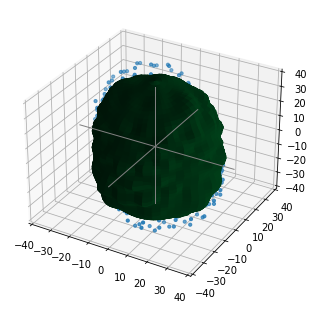

In [175]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pc[0,:],pc[1,:],pc[2,:], s = 10)
ploty(o[0],ax)
plt.show()

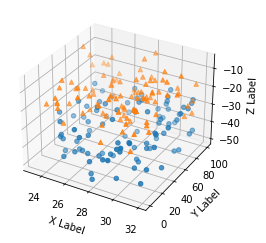

In [102]:
# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()